# Practising seaborn with stocks of AAPL, AMZN, GOOG, MSFT and TSLA

## Load in data

In [27]:
import glob
import pandas as pd
import numpy as np

In [2]:
# get a list of the csv files and make a df for each one. Also add a column with its code to identify the company (before combining)
code = []    
files = glob.glob("*\**.csv")
for file in files:
    code.append(file[7:11])
code

['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']

In [3]:
# get a list of lists of the dataframes
dfs = code[:] # makes a copy of variable
x = 0
for file in files:
    dfs[x] = pd.read_csv(file)
    x += 1

In [4]:
# add code name to each df
x = 0
for df in dfs:
    df['Code'] = code[x]
    x += 1

In [5]:
# now combine all dfs into one df
combined = pd.concat(dfs, axis=0, ignore_index=True)

## Analysis of data

In [6]:
combined

,Date,Open,High,Low,Close,Adj Close,Volume,Code
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100326,469033600,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095092,175884800,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088112,105728000,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090293,86441600,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092911,73449600,AAPL
...,...,...,...,...,...,...,...,...
33206,2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18293300,TSLA
33207,2022-04-11,980.400024,1008.469971,974.640015,975.929993,975.929993,19785700,TSLA
33208,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000,TSLA
33209,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700,TSLA


#### Create a month and year column

In [7]:
# change date to datetime
combined['Date'] = pd.to_datetime(combined['Date'])

# make new columns for month and year
combined['Month'] = combined['Date'].dt.month
combined['Year'] = combined['Date'].dt.year

In [8]:
combined.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Code,Month,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100326,469033600,AAPL,12,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095092,175884800,AAPL,12,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088112,105728000,AAPL,12,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090293,86441600,AAPL,12,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092911,73449600,AAPL,12,1980


### How does the volume vary for each stock with time

In [9]:
import seaborn as sns#
import matplotlib.pyplot as plt

# set seaborn theme
sns.set_theme()

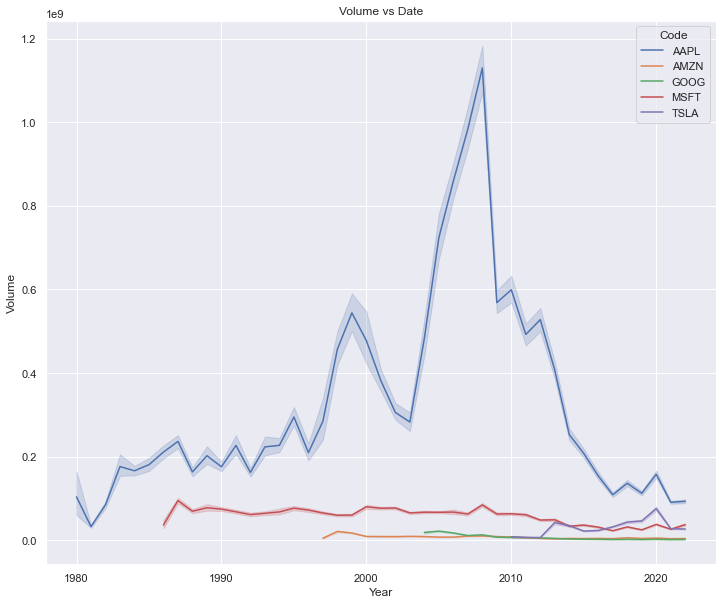

In [10]:
# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# plot
volume_1 = sns.lineplot(x='Year', y='Volume', data=combined, hue='Code').set(title='Volume vs Date')

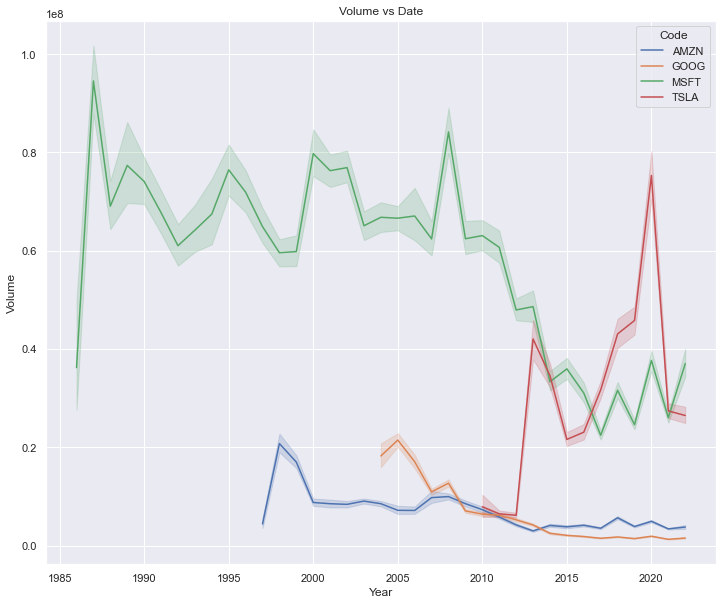

In [11]:
# volume without AAPL to compare the other 4 clearly
without_AAPL = combined[combined['Code'] != 'AAPL']

# plot
volume_2 = sns.lineplot(x='Year', y='Volume', data=without_AAPL, hue='Code').set(title='Volume vs Date')

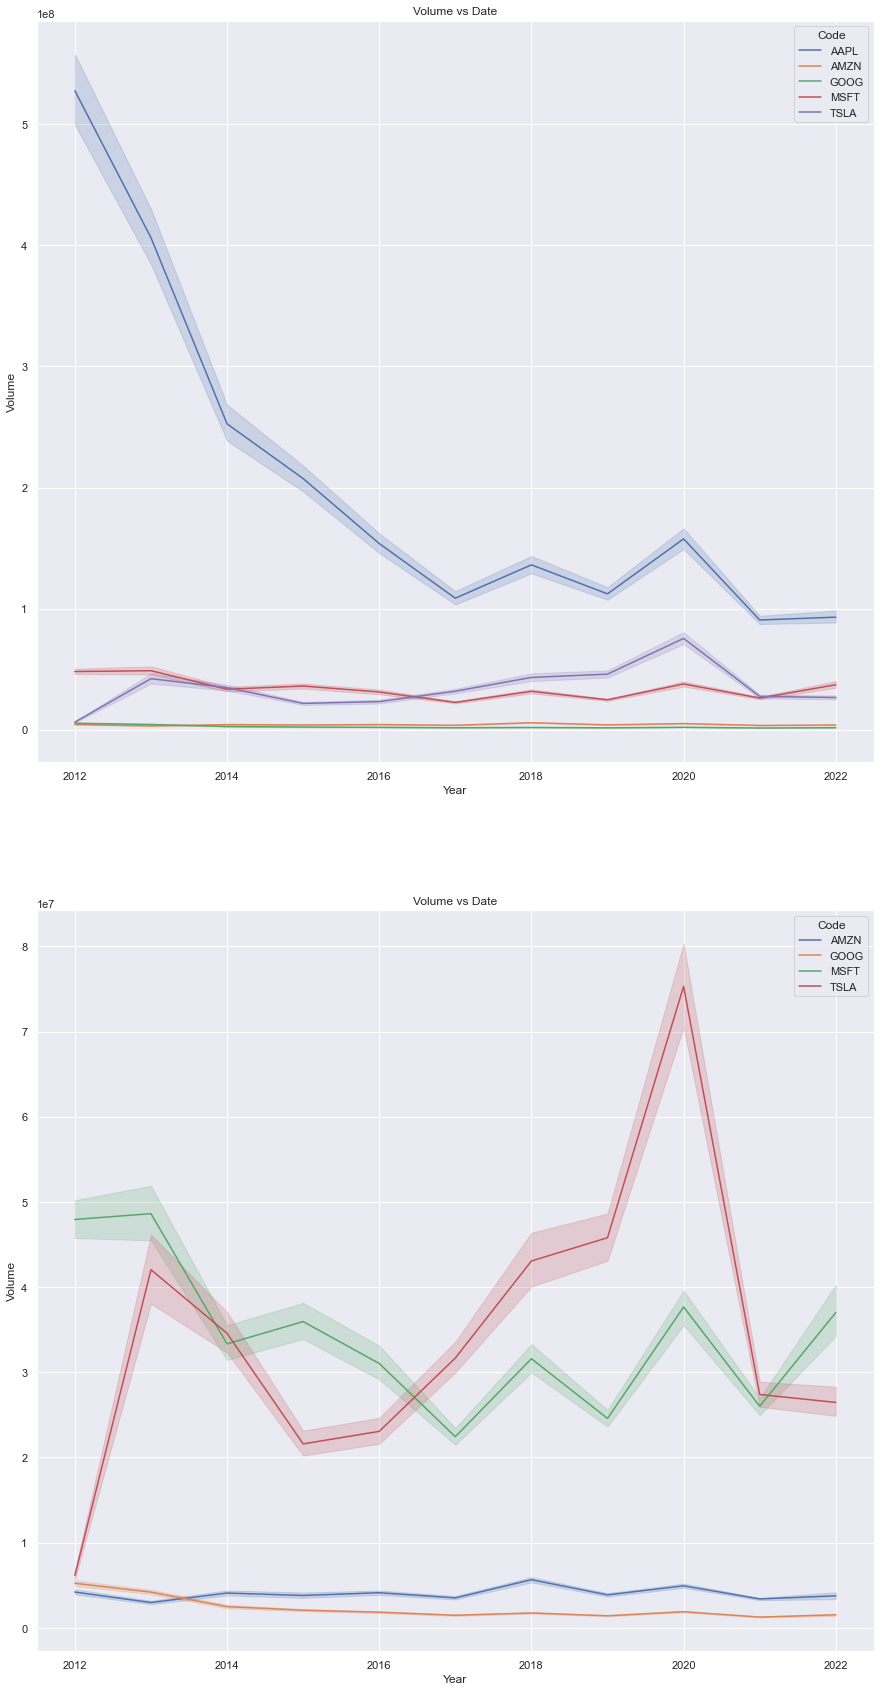

In [12]:
# Volume of each stock over the last 10 years
last_ten_with_AAPL = combined[combined['Year'] > 2011]
last_ten_without_AAPL = combined[(combined['Year'] > 2011) & (combined['Code'] != 'AAPL')]

# side by side plot
fig, ax = plt.subplots(2,1, figsize=(15,30))
sns.lineplot(x='Year', y='Volume', data=last_ten_with_AAPL, hue='Code', ax=ax[0]).set(title='Volume vs Date')
sns.lineplot(x='Year', y='Volume', data=last_ten_without_AAPL, hue='Code', ax=ax[1]).set(title='Volume vs Date')
plt.show()

### How does open price vary in the last five years for each company

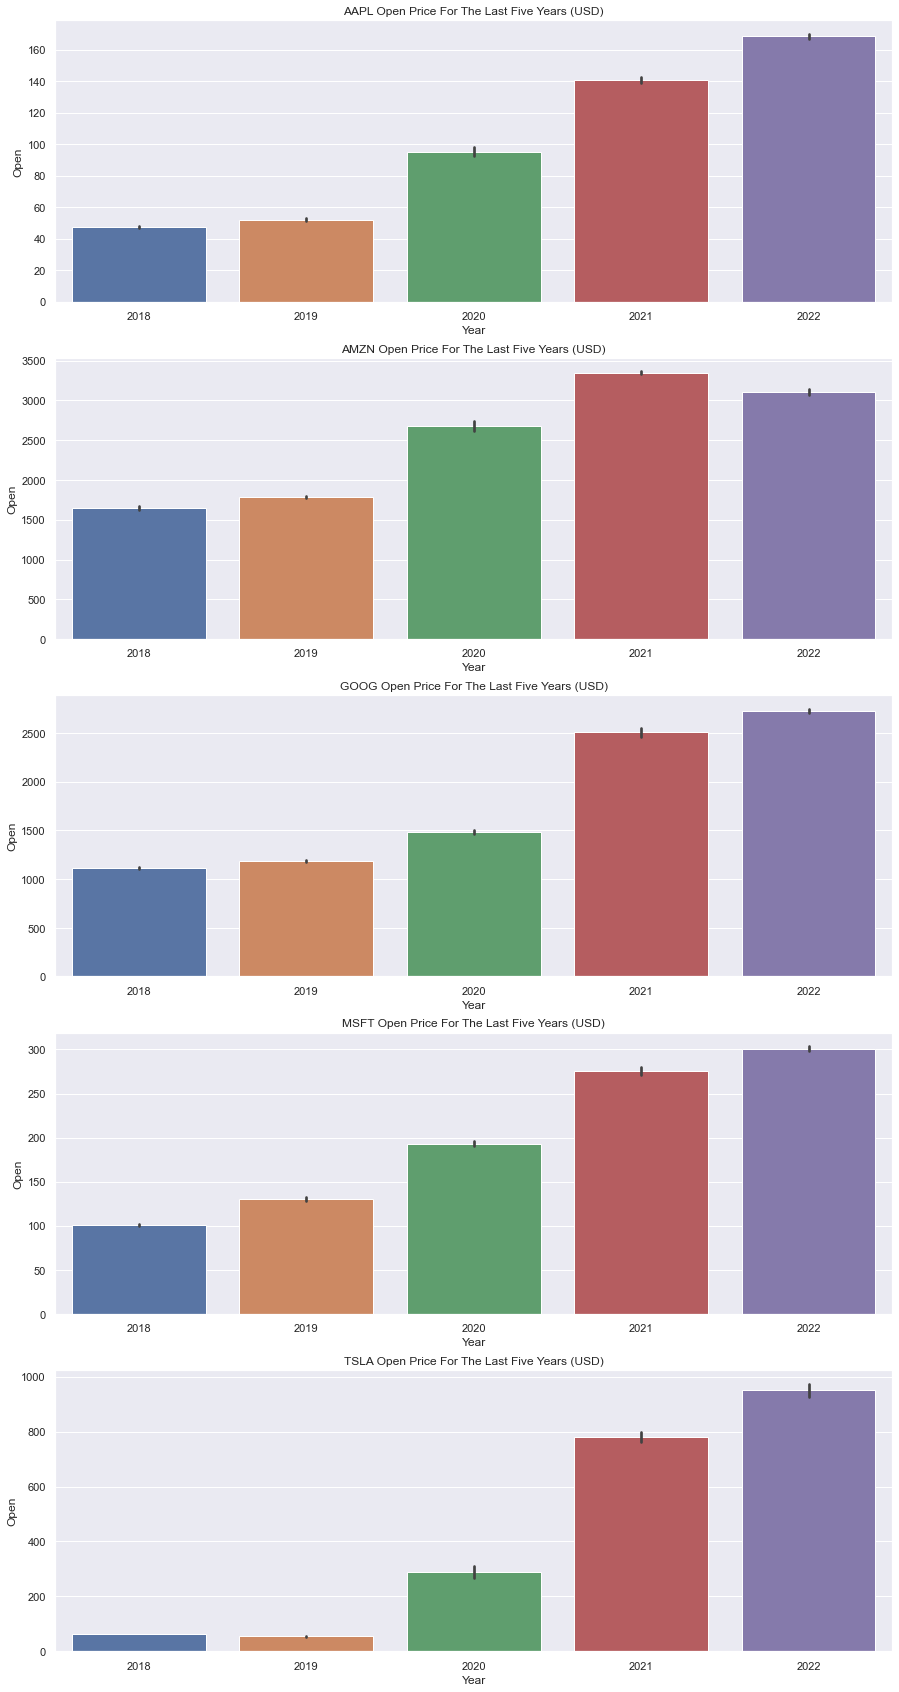

In [13]:
# side by side plot: This chart looks at the mean open price of each year
fig, ax = plt.subplots(5,1, figsize=(15,30))

last_five_years = combined[(combined['Year'] > 2017) & (combined['Code'] == 'AAPL')]
opening_price = sns.barplot(x='Year', y='Open', data=last_five_years, ax=ax[0]).set(title='AAPL Open Price For The Last Five Years (USD)')

last_five_years_2 = combined[(combined['Year'] > 2017) & (combined['Code'] == 'AMZN')]
opening_price_2 = sns.barplot(x='Year', y='Open', data=last_five_years_2, ax=ax[1]).set(title='AMZN Open Price For The Last Five Years (USD)')

last_five_years_3 = combined[(combined['Year'] > 2017) & (combined['Code'] == 'GOOG')]
opening_price_3 = sns.barplot(x='Year', y='Open', data=last_five_years_3, ax=ax[2]).set(title='GOOG Open Price For The Last Five Years (USD)')

last_five_years_4 = combined[(combined['Year'] > 2017) & (combined['Code'] == 'MSFT')]
opening_price_4 = sns.barplot(x='Year', y='Open', data=last_five_years_4, ax=ax[3]).set(title='MSFT Open Price For The Last Five Years (USD)')

last_five_years_5 = combined[(combined['Year'] > 2017) & (combined['Code'] == 'TSLA')]
opening_price_5 = sns.barplot(x='Year', y='Open', data=last_five_years_5, ax=ax[4]).set(title='TSLA Open Price For The Last Five Years (USD)')


plt.show()

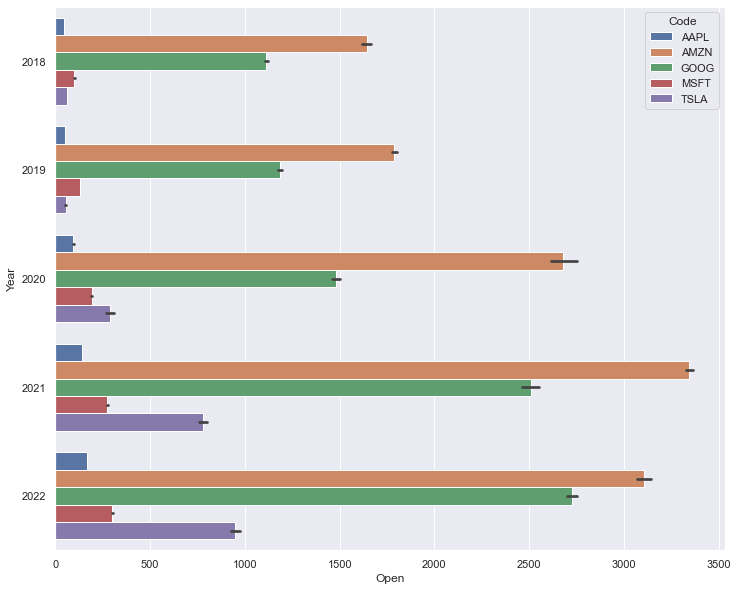

In [14]:
# comparatively
last_five = combined[(combined['Year'] > 2017)]

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# plot
with_hue = sns.barplot(x='Open', y='Year',  hue='Code', data=last_five, orient='h') # flipped chart

### Distribution of AAPL's open price

In [36]:
AAPL = combined[combined['Code'] == 'AAPL']['Open']
AAPL

0          0.128348
1          0.122210
2          0.113281
3          0.115513
4          0.118862
            ...    
10419    171.779999
10420    168.710007
10421    168.020004
10422    167.389999
10423    170.619995
Name: Open, Length: 10424, dtype: float64

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


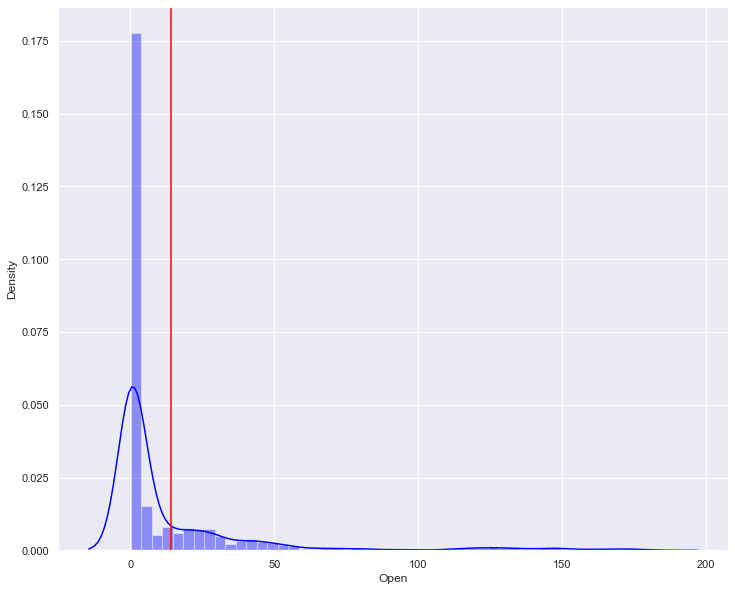

In [42]:
# plot
histo = sns.distplot(AAPL, color='blue')

# plot mean
mean = AAPL.mean()
plt.axvline(mean, 0, 1, color='red')

The open price is distributed towards the left, at around 0, meaning most of the opening prices were around that value. However, the mean value is above this distribution meaning, it has a really high price relative to what is was for a while

### Distribution of AAPL's volume

In [44]:
AAPL_v = combined[combined['Code'] == 'AAPL']['Volume']

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


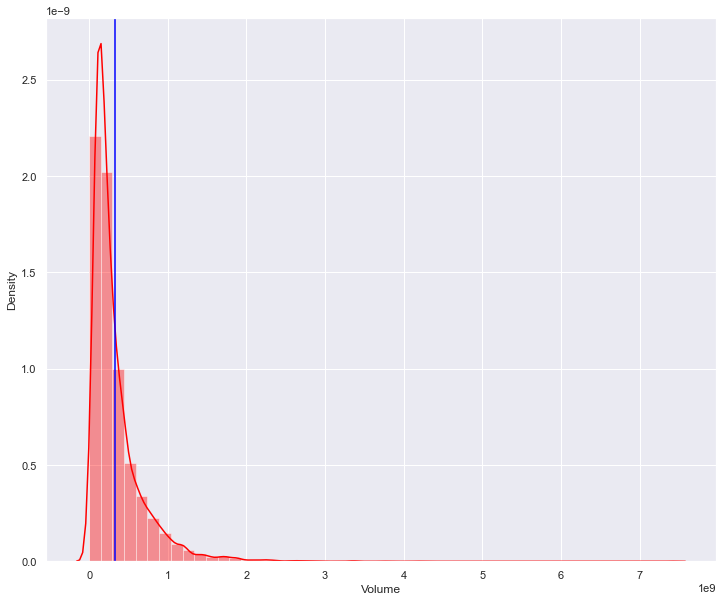

In [47]:
# plot
histo_v = sns.distplot(AAPL_v, color='red')

# plot mean
mean = AAPL_v.mean()
plt.axvline(mean, 0, 1, color='blue')

### Looking at the distribution of GOOG open price

In [101]:
GOOG = combined[combined['Code'] == 'GOOG']['Open']

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


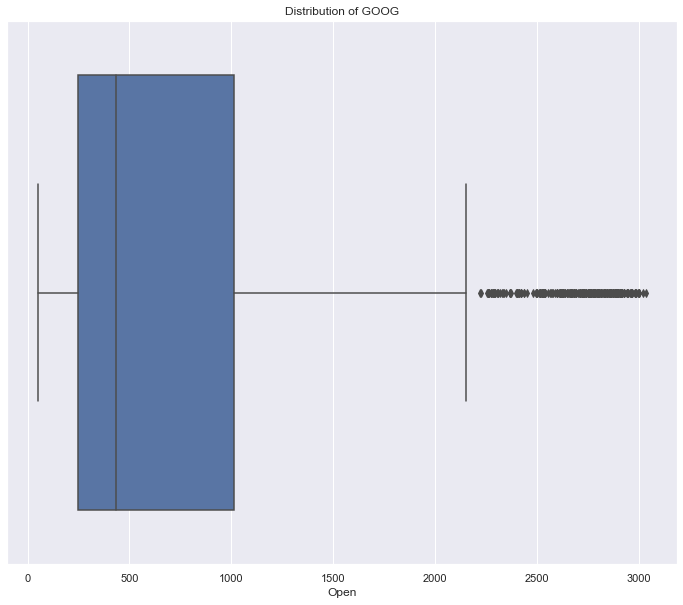

In [102]:
goog_box = sns.boxplot(GOOG).set(title='Distribution of GOOG')

In [66]:
print(f' Mean: {GOOG.mean()}\n Median: {GOOG.median()}\n UQ: {GOOG.quantile(.75)}\n LQ: {GOOG.quantile(.25)}\n')

 Mean: 696.6494399496174
 Median: 434.516327
 UQ: 1013.847473
 LQ: 247.70154925



### GOOG's distribution over  the last 5 years

In [73]:
GOOG_last_5 = combined[(combined['Code'] == 'GOOG') & (combined['Year'] > 2017)]

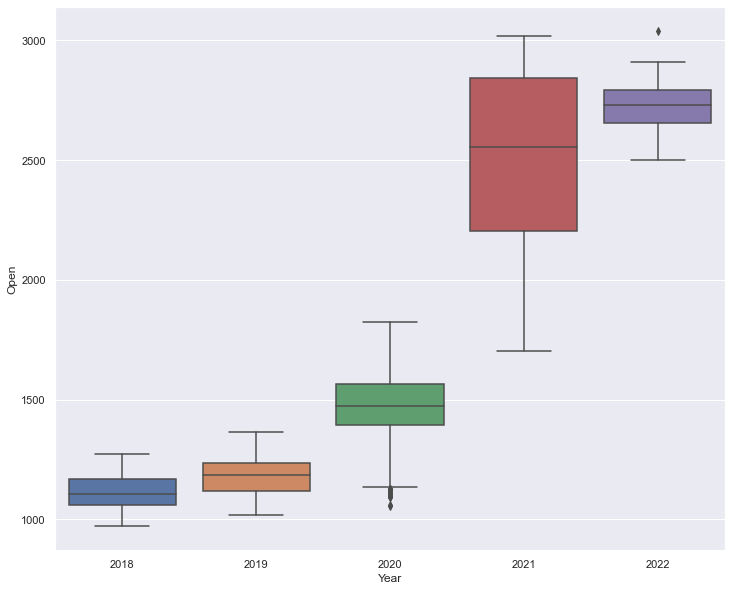

In [74]:
goog_5 = sns.boxplot(x='Year', y='Open', data=GOOG_last_5)

### What is the relationship between open and close price for TSLA last year

In [90]:
TSLA = combined[(combined['Code'] == 'TSLA') & (combined['Year'] > 2020)]

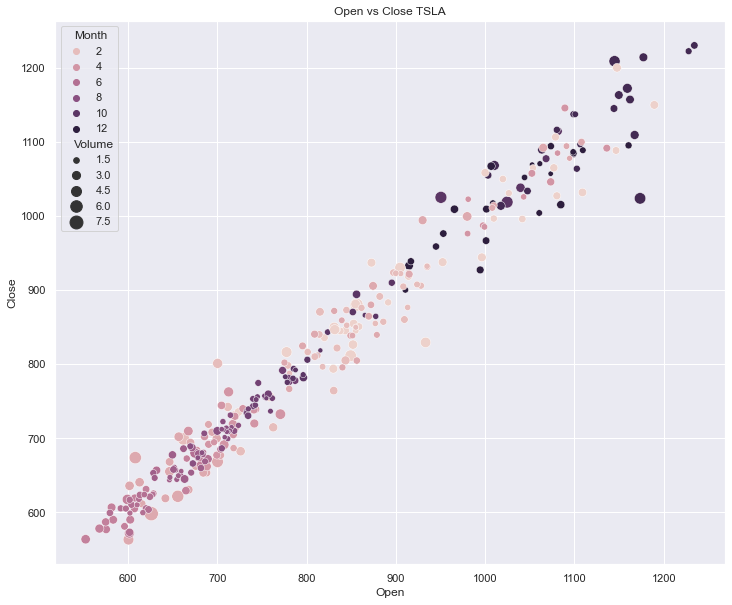

In [93]:
TSLA_plot = sns.scatterplot(x = 'Open', y='Close', data=TSLA, size='Volume', hue='Month', sizes=(20,200)).set(title='Open vs Close TSLA')

At the end of the year, TSLA tends to open and close at a higher price and there is more volume. This continues onto the new year and slowly with the price slowly dropping and the stock losing its volume. between the middle of the year, the price tends to be at its lowest

### Looking at MSFT in the past 3 years

In [95]:
MSFT = combined[(combined['Code'] == 'MSFT') & (combined['Year'] > 2019)]

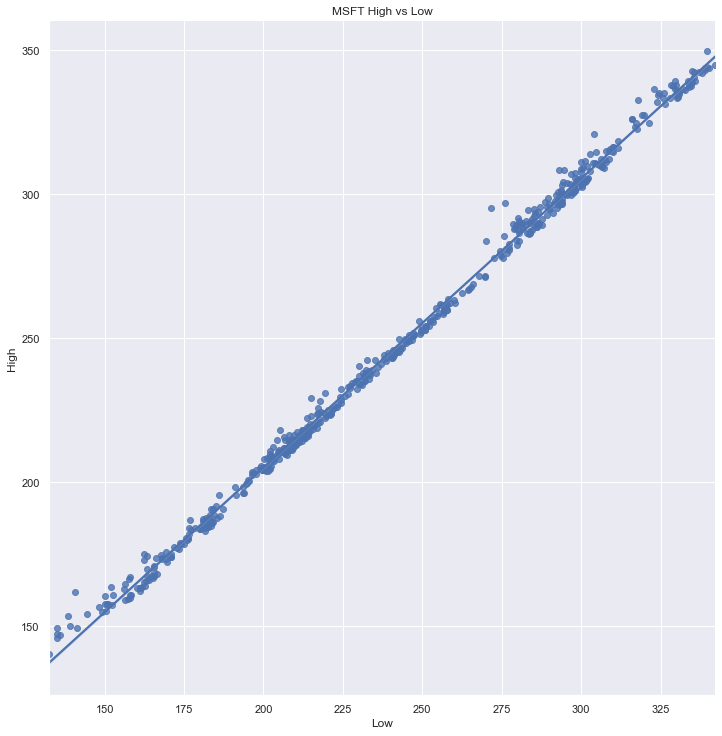

In [107]:
MSFT_plot = sns.lmplot(x='Low', y='High', data=MSFT, height=10).set(title='MSFT High vs Low')

### MSFT High vs Low Month



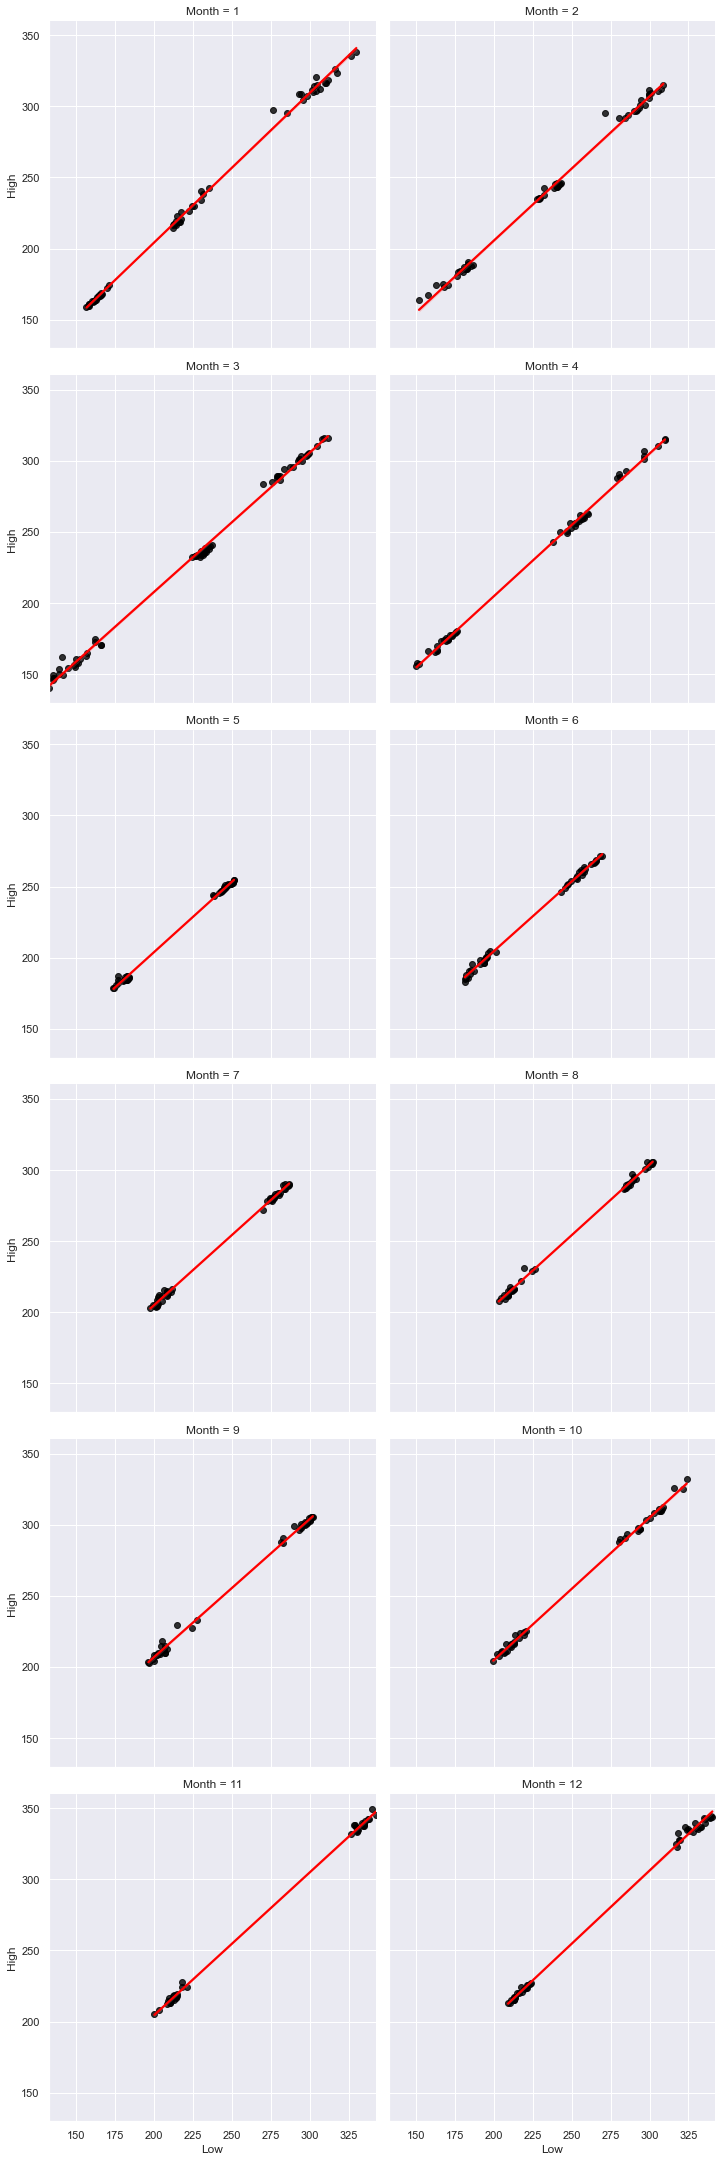

In [120]:
all_plot = sns.lmplot(x='Low', y='High', data=MSFT, height=5, col='Month', col_wrap=2, line_kws={'color': 'red'}, scatter_kws={'color': 'black'})

### Additional

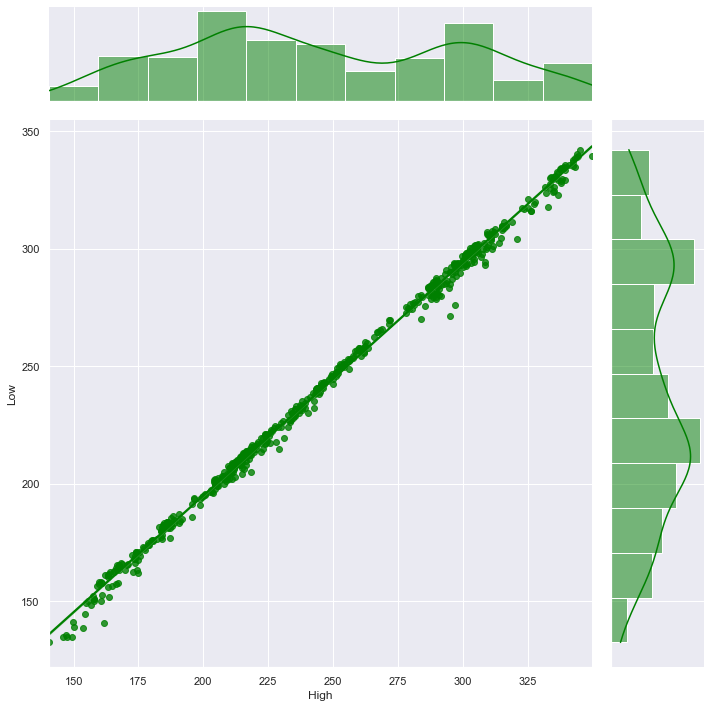

In [129]:
joint_plot = sns.jointplot(x='High', y='Low', data = MSFT, height = 10, color='green', kind='reg')

In [135]:
# heat map of TSLA High Low Open Close
pearson_corr = TSLA[['High', 'Low', 'Open', 'Close']].corr()
pearson_corr

,High,Low,Open,Close
High,1.000000,0.993312,0.995341,0.993934
Low,0.993312,1.000000,0.993288,0.994244
Open,0.995341,0.993288,1.000000,0.986276
Close,0.993934,0.994244,0.986276,1.000000


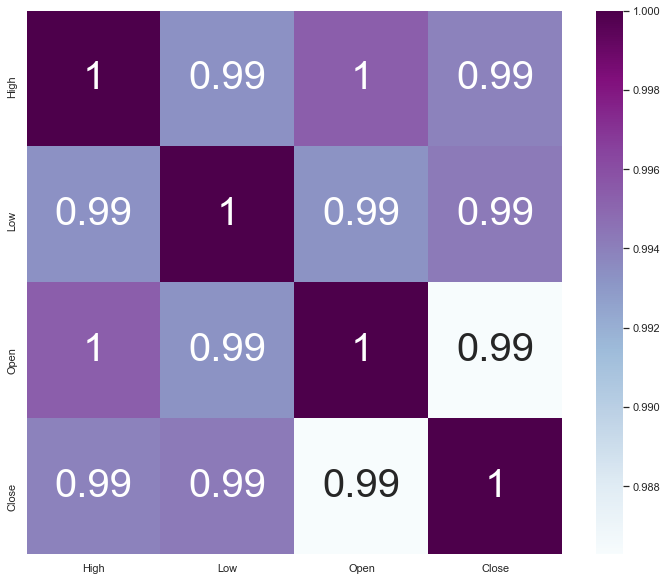

In [145]:
hm = sns.heatmap(pearson_corr, annot=True, annot_kws={'size':'40'}, cmap='BuPu')